In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')#here if we  write /Mydrive/Googl... then it will not work becuase its not in the same directory.

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Here we are going to predict the upward or downward trend of opening prices google stocks.

We also have to convert it into numpy arrays since RNNs need it.

In [5]:
train = df.iloc[:,0:2]#use of iloc is to achieve the desired row and columns via integer indexing.

In [6]:
train.head()#but what do we have to do with the time series data hence it is better if we drop it as of now.

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04


In [7]:
train = train.iloc[:,1].values#this .values converts it into a numpy array.

In [8]:
train.head()#this denotes train is no more a pandas dataframe object.

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [9]:
train

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

All data has to be pre-processed either via standardization or normalization for faster convergence in obtaining weights, for now using normalization(i.e data points within 0to1 inclusive will be found)

In [10]:
#Data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler(feature_range=(0,1))
scaled_train = scaled.fit_transform(train.reshape(-1,1))
#our original extracted data is unharmed since we have stored it in another variable

In [11]:
x_stock = []
y_stock = []
#y_stock is simply like a label here for comparing accuracy
#y_pred predicted by rnn on basis of x_stock
for i in range(60,len(scaled_train)):
  x_stock.append(scaled_train[i-60:i,0])#here scaled_train is an array and each element is a 1D array since column is specified
  y_stock.append(scaled_train[i])#not i+1 since upperbound is always excluded
x_stock,y_stock = np.array(x_stock),np.array(y_stock)
#the data structure we created is like ----60days data---- -> ydata(price)
#size and shape are property no need for parenthesis.

In [12]:
x_stock = np.reshape(x_stock,(x_stock.shape[0],x_stock.shape[1],1))

In [13]:
rnn = tf.keras.models.Sequential()

Implementing a stacked LSTM model for predicting google stock prices is important since according to the law of brownian motion stock prices cannot be predicted based on previous data hence it is important for avoiding any overfitting of data which includes dropout as a penalty term to avoid regularization.

In [14]:
#introducing dropout regularization so that overfitting is avoided.
#we need LSTM , Dense, Dropout, Sequential classes from keras.
#we have to rehersively crosscheck on parameters and then choose units this has already been done and hence 64 is chosen.
rnn.add(tf.keras.layers.LSTM(units = 64,return_sequences=True,input_shape=(x_stock[0].shape)))
rnn.add(tf.keras.layers.Dropout(0.2))

In [15]:
rnn.add(tf.keras.layers.LSTM(units = 64,return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))#default standard it can be changed for improvement in the model.

In [16]:
rnn.add(tf.keras.layers.LSTM(units = 64,return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))#default standard it can be changed for improvement in the model.

In [17]:
rnn.add(tf.keras.layers.LSTM(units = 64))#since this is the last layer and default value is  false!!!
rnn.add(tf.keras.layers.Dropout(0.2))#default standard it can be changed for improvement in the model.

In [18]:
rnn.add(tf.keras.layers.Dense(units = 1))
#this was a time series data hence many to many relation is found consequently return sequences were used.
#since the previous layers didnt had to return this layer is the output layer hence we use Dense class

In [19]:
rnn.compile(optimizer = 'adam',loss = 'mean_squared_error')#RMSprop could also be used as an optimizer for rnns but adam is more robust

In [20]:
rnn.fit(x_stock,y_stock,epochs = 100, batch_size=32)
#now we train the model on the dataset, we have  to provide for 4 arguments, dataset,target(actual),timestep and number  of epochs

Epoch 1/100
38/38 [==============================] - 10s 16ms/step - loss: 0.0354
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 3/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 13/100
38/38 [====

Further to compare and obtain the model prediction abilities
1. Converting the test data into similar format of tensors.
2. Obtaining predictions and then inversing the transform method applied.
3. Plot the actual stock price and the predicted.

In [21]:
df_test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')#here if we  write /Mydrive/Googl... then it will not work becuase its not in the same directory.

In [22]:
test = df_test.iloc[:,1].values
#for avoiding data leaks we have to separately apply minmax scaling

In [23]:
scaled_test = scaled.transform(test.reshape(-1,1))

In [24]:
# final_test = []
# final_test.append(scaled_train[])
# final_test.append(scaled_test[])

#A better approach is to use np.concatenate

final_test = np.concatenate((scaled_train[-60:],scaled_test),axis = 0)
x_stock_test = []
predicted_stock = []
for i in range(60,80):
  x_stock_test.append(final_test[i-60:i,0])

In [25]:
x_stock_test = np.array(x_stock_test)

In [26]:
predicted_stock.append(rnn.predict(x_stock_test))

1/1 [==============================] - 1s 1s/step


In [31]:
predicted_stock = np.array(predicted_stock)
predicted_stock = scaled.inverse_transform(predicted_stock[0])

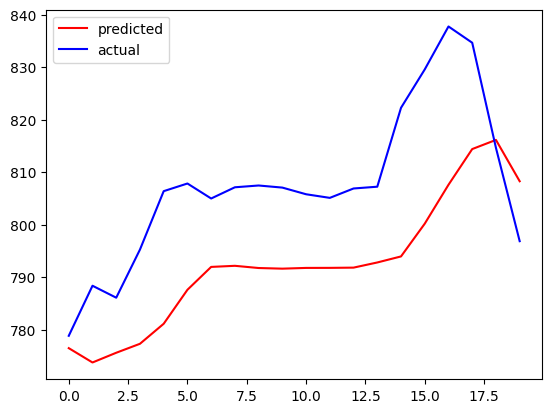

In [38]:
plt.plot(predicted_stock,color = 'red',label = 'predicted')
plt.plot(test,color = 'blue',label = 'actual')
plt.legend()
plt.show()

The observation that stock prices appear to be random highlights the importance of recognizing underlying trends before making investment decisions. By dedicating time to analyze these trends, investors can potentially enhance their strategies. Additionally, employing robust methodologies such as Monte Carlo simulations and Kalman filters can further refine investment approaches, providing valuable insights and improving decision-making accuracy.